MNIST dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf


Shown below is the MNIST dataset

In [2]:
data_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
data_mnist

11493376/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

#1. LOADING THE DATASET  AND EXPLORING IT 
Splittint the entire dataset into testing and developmental dataset

In [3]:
(X_dev,Y_dev),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()
print("Developmental set")
print(X_dev.shape)
print(Y_dev.shape)


print("Testing set")
print(X_test.shape)
print(Y_test.shape)

Developmental set
(60000, 28, 28)
(60000,)
Testing set
(10000, 28, 28)
(10000,)


The devlopmental dataset has 60k rows with images of 28 pixel by 28 pixel

The testing dataset has 10k rows with images of 28 pixel by 28 pixel


##Exploring the classes in the dataset

In [4]:
print("Number of classes in the developmental dataset")
print(np.unique(Y_dev))

print("Number of classes in the testing dataset")
print(np.unique(Y_test))

Number of classes in the developmental dataset
[0 1 2 3 4 5 6 7 8 9]
Number of classes in the testing dataset
[0 1 2 3 4 5 6 7 8 9]


There are 10 unique classes in the dataset


##HISTOGRAM OF THE DEVELOPMENTAL DATASET

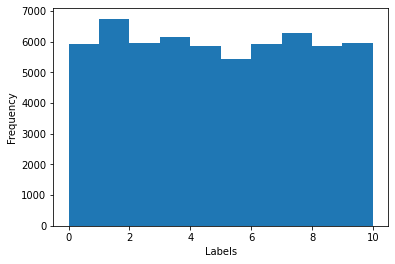

In [5]:
plt.figure()
plt.hist(Y_dev,bins = range(0,11))#since the numbers range from 0 to 10
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()

The propositions of labels in the developmental datset depict a uniform distribtion 

##SPLITTING DEVELOPMENTAL SET INTO TRAIN AND VALIDATION SET

In [6]:
indexes = np.arange(Y_dev.size ,dtype = int) #creating an array of all the labels in the developmental set
#size of the samples in the development set, type
np.random.shuffle(indexes) # shuffling the indexes
X_dev = X_dev[indexes]
Y_dev = Y_dev[indexes]
# need to shuffle them in a syncoryzed manner so that the x and y correspond to one another

#DEFINING THE SPLIT RATIO
nsplit = int(0.75*Y_dev.size) # split ratio of the developmental dataset
#splitting data into 75% developmental set and 25% test set

X_train = X_dev[:nsplit]
Y_train = Y_dev[:nsplit]

X_val = X_dev[nsplit:]
Y_val = Y_dev[nsplit:]

print("Samples in training set")
print(X_train.shape)

print("Samples in validation set")
print(X_val.shape)

Samples in training set
(45000, 28, 28)
Samples in validation set
(15000, 28, 28)


From 60k samples in the training set 45k went to training set and 15k went to validation set

##DEPICTING BASIC INFORMATION ABOUT THE DATASET

In [7]:
print("Training dataset info")
print(X_train.min(), X_train.max(), X_train.mean(),X_train.std())

print("--------------------------------------")
print("Validation dataset info")
print(X_val.min(), X_val.max(), X_val.mean(),X_val.std())

Training dataset info
0 255 33.36056865079365 78.61502888368025
--------------------------------------
Validation dataset info
0 255 33.19197984693878 78.42456447683483


Here we see the basic information aboutr the dataset
In the trainining dataset the we see the min,max, mean and standard deviation are 0, 255, 33 and 78 respectively

In the validation dataset the we see the min,max, mean and standard deviation are 0, 255, 33 and 79 respectively

Both the values seem to be close ie. the data has been shuffled well

#2. DATA SCALING

In [8]:
norm_type = 0 #0 ---> min_max normalization , 1----> standardization (mean/std)

if norm_type == 0:
  X_train = X_train/255
  X_val = X_val/255
  X_test = X_test/255
elif norm_type == 1:  
  train_mean = X_train.mean()
  train_std = X_train.std()
  X_train = X_train -train_mean /train_std
  X_val = X_val -train_mean /train_std
  X_test = X_test -train_mean /train_std  
else:
  pass # no normalization at all  

#3.One Hot Encoding

In [15]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train)
Y_val_oh = tf.keras.utils.to_categorical(Y_val)
Y_test_oh = tf.keras.utils.to_categorical(Y_test)

print("First 5 samples of the training dataset")
print (Y_train[0:5])

print("First 5 one hot encoded samples of the training dataset")
print (Y_train_oh[0:5])

First 5 samples of the training dataset
[6 9 7 5 8]
First 5 one hot encoded samples of the training dataset
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


It seems that one hot encoding has been done correctly

#4.Define your model,cost function, optimizer, learning rate

In [9]:
def my_model(ishape= (28,28,1), k = 10 , lr = 1e-4): # grey image has 1 channel and a RGB image is 3# k or classes is 10 
    input_model = tf.keras.layers.Input(shape = ishape) # input has no paramerters
    l1 = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ) (input_model) # Conv2D as we r woking with 2d images , # number of filters is 32 # kernal size is 3 x 3
 #number of paramaters = filter size x number of filters x channel of previous layer is euql ato bias of previous layer  + bias is equal to number of filers = 3 x 3 x 32 x 1 + 32 (# channels in input are 1 as it is a white and black image) ( bias is equal to 32 since each convonution filter has a bias term)
    l2 = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ) (l1) # 32 filters assumed  # 32 x 3 x3 x32 + 32 (# output of previous layer will have 32 channels )
    l3 = tf.keras.layers.MaxPool2D(2,2) (l2) # here we chose a pooling size of 2 x 2 and max pooling has no parameters
    l4 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu' ) (l3) # after max pooling iamges is smaller and having that much filters is not that expensive # 3x3 x64x 32 + 64 (bias is equal to number of filters )
    l5 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu' ) (l4) # 64 filters assumed  # 64 x 3 x3 x64 + 64
    l6 = tf.keras.layers.MaxPool2D(2,2) (l5) # here we chose a pooling size of 2 x 2 and max pooling has no parameters
    flat = tf.keras.layers.Flatten()(l6) # before we move to fcnn we need to perform flattening
    out = tf.keras.layers.Dense(10, activation = 'softmax')(flat) # 1o classes
    model = tf.keras.models.Model(inputs = input_model, outputs = out)
    model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

#NEW FOR CNN





In [10]:
model = my_model()
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0     

#5. Defining 3 callbacks (callbacks means that if the model is not improving it will stop)

In [16]:
model_name = "best_model_mnist.h5"
#CALLBACK - 1 - early_stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 20) # if for 20 epochs the val_loss does not improve the training is going to be intereppupted
#patience is how long the model is going to train without intereppupting

#CALLBACK - 2 - monitor
monitor = tf.keras.callbacks.ModelCheckpoint (model_name, monitor = 'val_loss',save_best_only = True , save_weights_only = True )
# you save the best model and the weights
#the callback is going the keep on chekcing the validation error and if teh validation error decreases tehn we will save the model as the best model
# mode is whether u wabnt to save the minimum or maximum value of teh cost function, we are not defining mode as it is automaticcally defined defined by tf

#CALLBACK - 3 - lr_schedule
def scheduler(epoch, lr):
  if epoch%10==0:  #every 10 epoch reduce the learning rate by a factor of 2 # 10 here use some other number elsewhere
    lr = lr/2
  return lr
  
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)# definding the callback

TRAINING THE MODEL

In [17]:
model= my_model() #model is calling the model function that was defined in step 4
#fit my model
model.fit(X_train[:,:,:,np.newaxis],Y_train_oh,batch_size = 32, epochs=  200, verbose = 1, callbacks = [early_stop, monitor, lr_schedule], validation_data = (X_val,Y_val_oh), shuffle = True)
#NEW FOR CNN - X-train representation is number of samples ,size of the image , number of channels , here we have only one channel so we add np.newaxis
#larger batches take longer to train and smaller batch sizes can train faster
#graident approxinmation for a small batch size may not be that good
# batch_size is the number of samples taht we use to estiamet teh gradient before taking one step
#shuffle ie.e batches that u snet to the GPU are shuffled

Epoch 1/200
1407/1407 [==============================] - 113s 80ms/step - loss: 1.1637 - accuracy: 0.6908 - val_loss: 0.2236 - val_accuracy: 0.9336
Epoch 2/200
1407/1407 [==============================] - 113s 80ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.1408 - val_accuracy: 0.9563
Epoch 3/200
1407/1407 [==============================] - 113s 80ms/step - loss: 0.1349 - accuracy: 0.9610 - val_loss: 0.1051 - val_accuracy: 0.9675
Epoch 4/200
1407/1407 [==============================] - 115s 82ms/step - loss: 0.1013 - accuracy: 0.9700 - val_loss: 0.0904 - val_accuracy: 0.9709
Epoch 5/200
1407/1407 [==============================] - 113s 80ms/step - loss: 0.0815 - accuracy: 0.9751 - val_loss: 0.0790 - val_accuracy: 0.9754
Epoch 6/200
1407/1407 [==============================] - 112s 80ms/step - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0706 - val_accuracy: 0.9775
Epoch 7/200
1407/1407 [==============================] - 114s 81ms/step - loss: 0.0638 - accuracy: 0.9806 - val_

Here we know the training dataset has 45k samples and a batch size of 32. So we need to train 1406.5 , approximately 1407 samples in each batch
1407*32 = 45K should be equal to the number of data points in the training set

Here we stop at epoch lower than 200 because the validation error is not improving any further



### 7.TESTING THE MODEL ON THE TEST SET AND EXTRACTING RELEVANT METRICS

In [18]:
model.load_weights(model_name) # here the weight we are produced during model training
metrics = model.evaluate(X_test, Y_test_oh) # it will return the loss and metrics when we are testing the model # here we have categorical cross entropy here is loss and accuracy is the metrics
#print(metrics) # in step 4 we stated that we wan to measure and monitor two metrics
print("Categorical cross-entropy:" , metrics[0])
print("Accuracy:" , metrics[1])


313/313 [==============================] - 6s 20ms/step - loss: 0.0347 - accuracy: 0.9891
Categorical cross-entropy: 0.03465268015861511
Accuracy: 0.9890999794006348


#LOOKING AT THE WRONGLY CLASSIFIED IMAGES

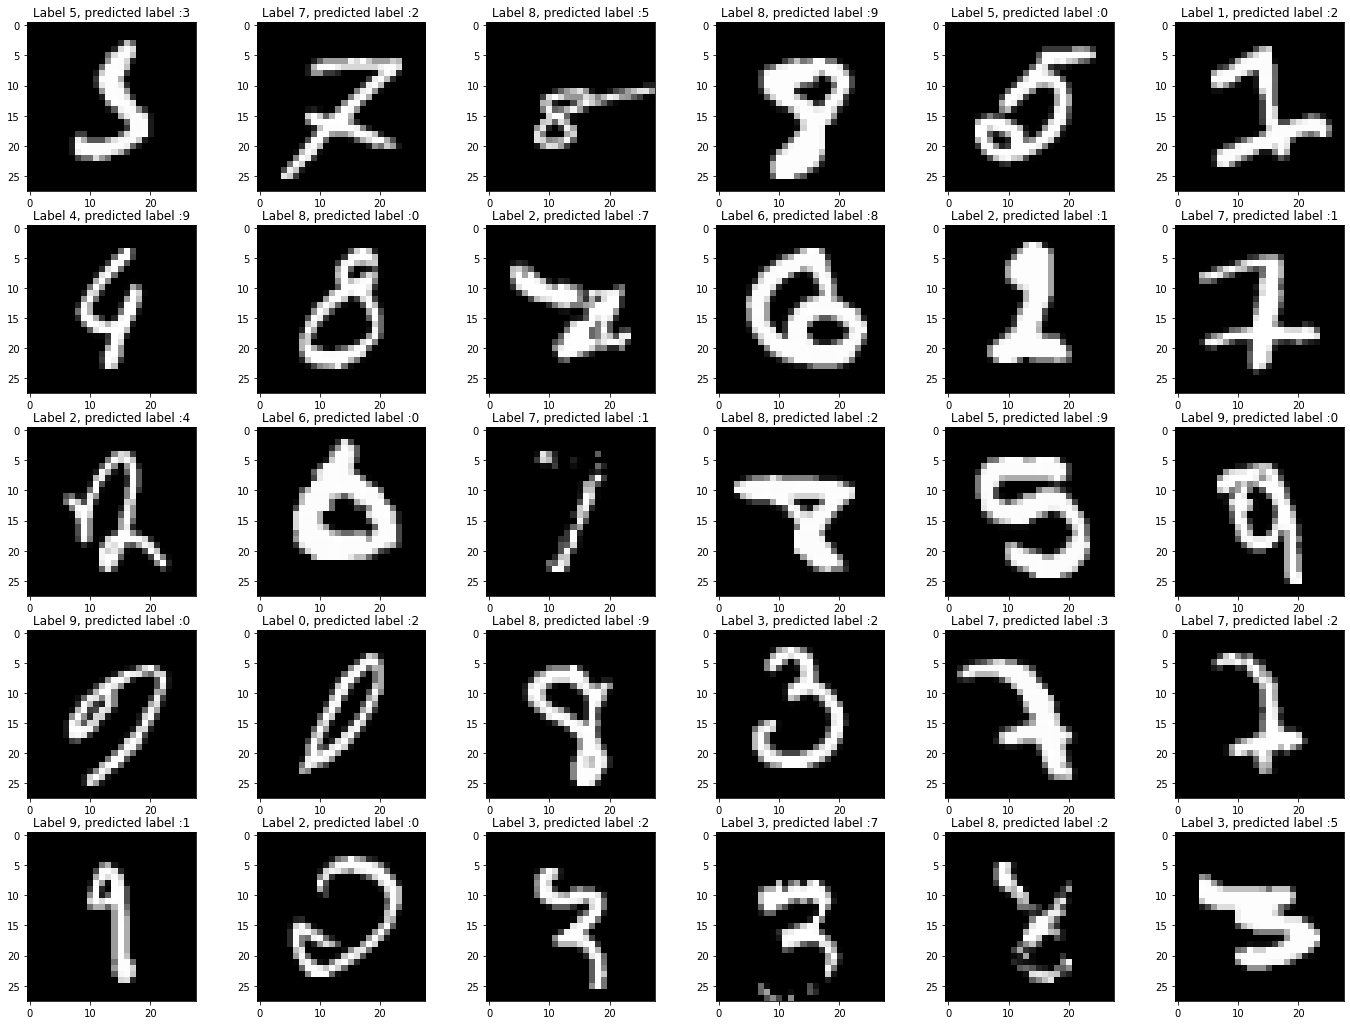

In [19]:
Y_pred = model.predict(X_test).argmax(axis = 1)# Here we are looking at the iamges and predicting the labels across the rows of the test set
#print(Y_pred)
# input is x_test and labels is being predicted
# here we are predicting the class with the highest probability
#printing the indexes where y_pred is not equal to y_test
wrong_indexes = np.where(Y_pred !=Y_test)[0] #Predictions are differnet from the ground truth ie. test set
#print(wrong_indexes)

#print out a sample of indexes that have been incoorectly classified
 #looking at images that I want to identify incoorectly classified images so that I can understand where my model is unable to get correct results
sample_indexes = np.random.choice (np.arange(wrong_indexes.size, dtype  = int), size = 30, replace = False ) #chosing 30 cases when the classification did not work
 # 30 wrong images that are not repeasted
 #above we show a subset of indexes
#print(sample_indexes)
#polotting cases when the classification failed
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes): # looking through 30 wrong images # index  is ii and position is jj
   plt.subplot(5,6,ii+1) # each figure will have a different subplot. Each subplot wiull have 5 rows and 6 columns starting at index 1 (ii+1)
   plt.imshow(X_test[wrong_indexes[jj]], cmap = 'gray') # the image that i want to show is the wrong image at position jj
   plt.title("Label %d, predicted label :%d"%(Y_test[wrong_indexes[jj]], Y_pred[wrong_indexes[jj]]))
   #print(ii) # index is 0 to 30 in the sample dataset
   #print(jj) #position in teh sample daatset( where the image is wrongly classfiied) where teh index position is above. It can eb anything ebwteen 0 to 10k ie.e. size of test sampel dataset
   #print(wrong_indexes[jj]) #finding the indexes in the TEST SET at those positions for the wrong iamges
   #Here we r print out teh image if what was preducted by x_test at that index position
plt.show()



 Three callbacks were defined in the dataset
 


**CONCLUSION**
For the fully connected neural network (FCNN):
- The accuracy of test dataset is 91%.
- The Categorical cross-entropy of the test set is 0.33


For the convolutional connected neural network (CNN):
- The accuracy of test dataset is 98.9%.
- The Categorical cross-entropy is 0.34.
- Three callbacks were defined in the dataset


Also, we relialized that the difference between FCNN and CNN is that CNN is  computionally more intensive, more complex even tho it has less parameters to learn since we are dealing wth convulutions. In FCNN we deal with matrix mutiplication 
